# Project One

Joshua Hummell and Scott Reed

Youtube Link: [https://youtu.be/4Vf5dv8cMk4](https://youtu.be/4Vf5dv8cMk4)

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import collections
from scipy import stats as st
import os

### 1. Load the data

Since I already found and cleaned the data, I will load it into Python as a dataframe then convert it over to a networkx graph object...

Special thanks to this thread for helping me find it


[https://stackoverflow.com/questions/42558165/load-nodes-with-attributes-and-edges-from-dataframe-to-networkx](https://stackoverflow.com/questions/42558165/load-nodes-with-attributes-and-edges-from-dataframe-to-networkx)

First, we load the data and check it

In [3]:
f = pd.read_csv("movie_metadata.csv", sep=',')
f.head()

,actor_2_name,actor_1_name,Actor One Gender,Actor Two Gender
0,Rory Kinnear,Christoph Waltz,female,female
1,Christian Bale,Tom Hardy,male,female
2,Donna Murphy,Brad Garrett,male,male
3,Robert Downey Jr.,Chris Hemsworth,male,male
4,Daniel Radcliffe,Alan Rickman,male,male


second we make a unique dataframe for actors and genders

In [16]:
f_1 = f[['actor_1_name','Actor One Gender']]
f_2 = f[['actor_2_name','Actor Two Gender']]
f_key = pd.concat([f_1, f_2], ignore_index=True)
f_key = f_key.drop_duplicates()
f_key.reset_index(inplace=True)

f_key = f_key.rename(columns = {'Actor One Gender':'gender'})

f_key = f_key[['actor_1_name','gender']]


f_key = f_key.loc[~f_key['gender'].isna()]
f_key= dict(zip(f_key.actor_1_name, f_key.gender))

Then we convert it to a networkx graph

In [17]:
G = nx.convert_matrix.from_pandas_edgelist(f,source='actor_1_name', target='actor_2_name')

nx.set_node_attributes(G, f_key, 'gender')

Check to see if it worked

In [21]:
list(nx.get_node_attributes(G,'gender'))[0:10]

['Christoph Waltz',
 'Tom Hardy',
 'Christian Bale',
 'Brad Garrett',
 'Donna Murphy',
 'Chris Hemsworth',
 'Robert Downey Jr.',
 'Alan Rickman',
 'Daniel Radcliffe',
 'Henry Cavill']

And now let's take a look at the count

(array([185.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 363.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

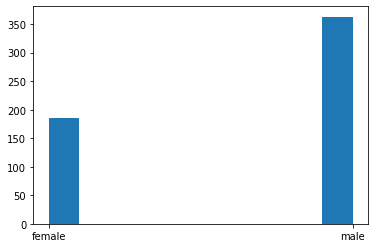

In [22]:
node_gender = list(nx.get_node_attributes(G,'gender').values())
plt.hist(node_gender)

We can see that there are significantly more males than females. Let's take a look at the network graph. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


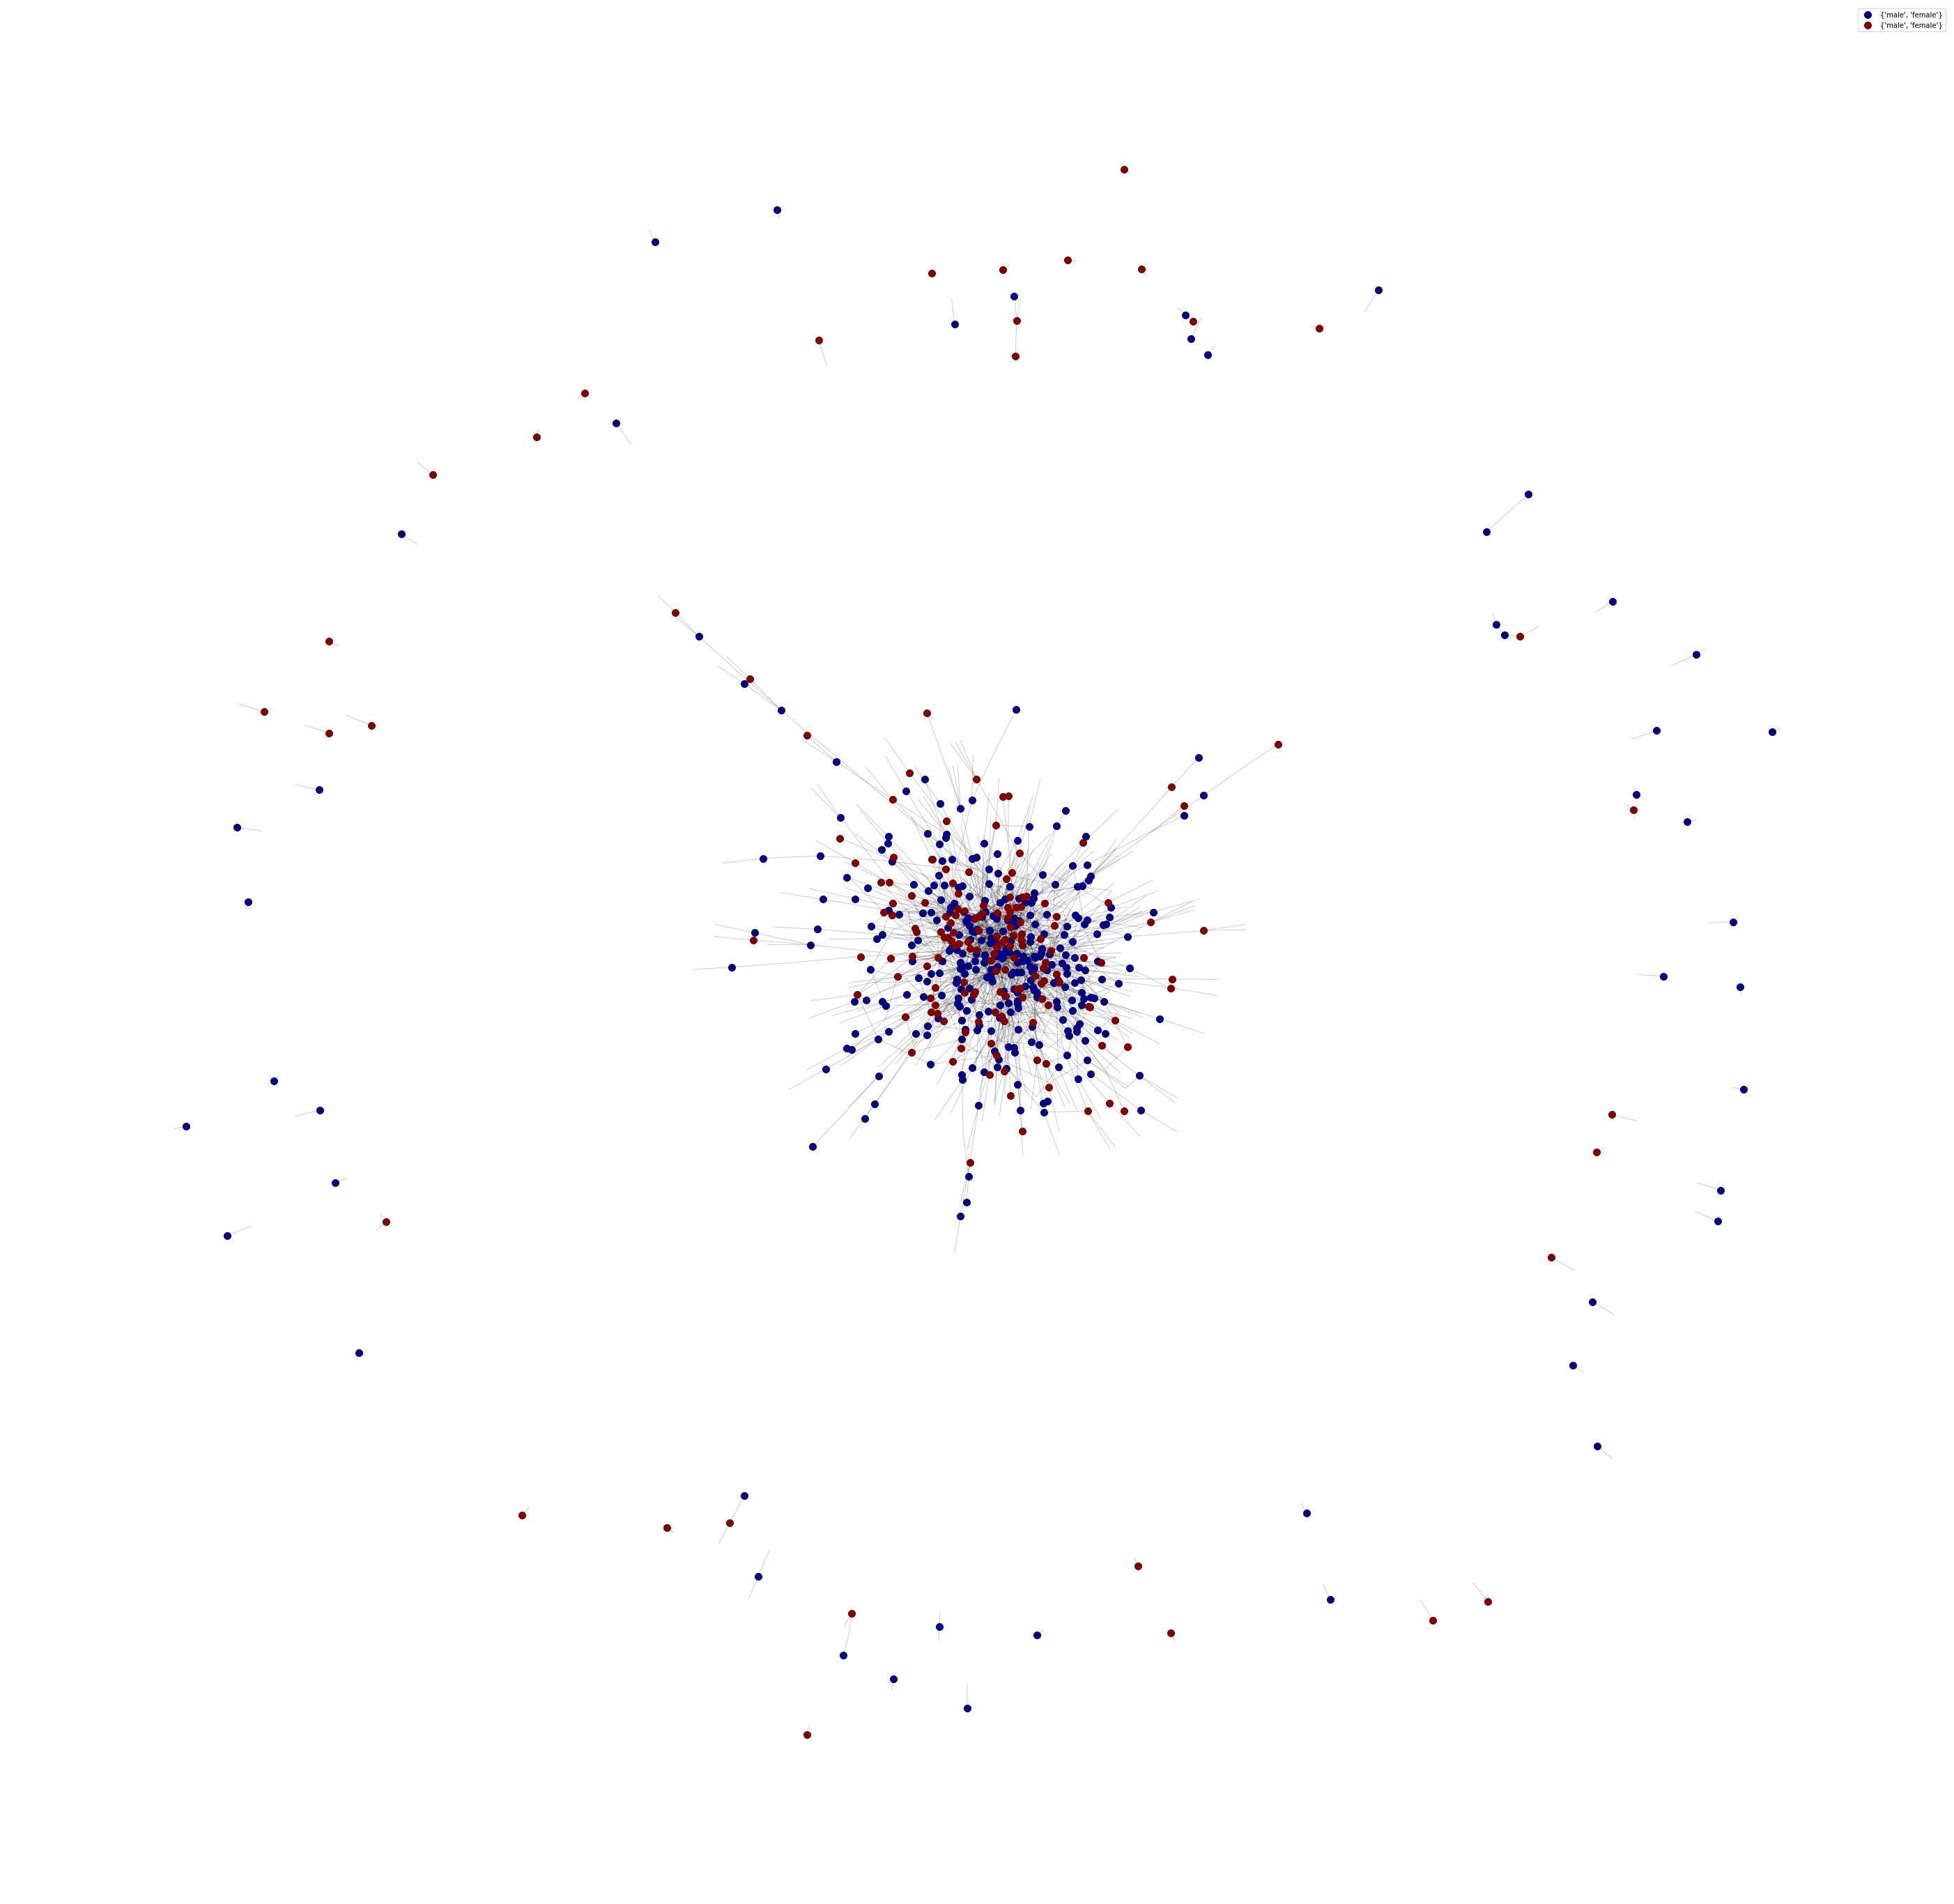

In [23]:
plt.figure(figsize=(50,50))
gender = set(node_gender)
gender_dict = nx.get_node_attributes(G,'gender')
colors = [plt.cm.jet(x) for x in np.linspace(0,1,len(gender))]
pos = nx.spring_layout(G)

for i, gen in enumerate(gender):
    gen_nodes = [node for node, value in gender_dict.items() if value == gen]
    nx.draw_networkx_nodes(G, pos, nodelist=gen_nodes, node_color=colors[i], label=gender, node_size=100, cmap=plt.cm.jet)
    
nx.draw_networkx_edges(G, pos, alpha=.2)
    
plt.legend()
plt.axis('off')
plt.show()

Thanks to:
    [https://stackoverflow.com/questions/28910766/python-networkx-set-node-color-automatically-based-on-number-of-attribute-opt](https://stackoverflow.com/questions/28910766/python-networkx-set-node-color-automatically-based-on-number-of-attribute-opt)
and Mridul Seth for his work in Networkx [https://mriduls.com/](https://mriduls.com/)



Now let's get the Degree Centrality

### 2 Degree Centrality

Let's create a quick dataframe with a list of the movie stars and their degree of centrality

In [24]:
(pd.DataFrame(list(nx.degree(G)))).sort_values(1, ascending = False)

,0,1
16,Johnny Depp,26
176,Denzel Washington,22
178,Will Ferrell,20
154,Matt Damon,20
104,Liam Neeson,20
...,...,...
697,Charlotte Le Bon,1
696,Manish Dayal,1
695,Eric Lloyd,1
225,Roy Scheider,1


Looks Like Johnny Depp is the most popular with 26 number of degrees, and several people have 1, which is the lowest number of degrees

Let's take a look at Johnny Depp

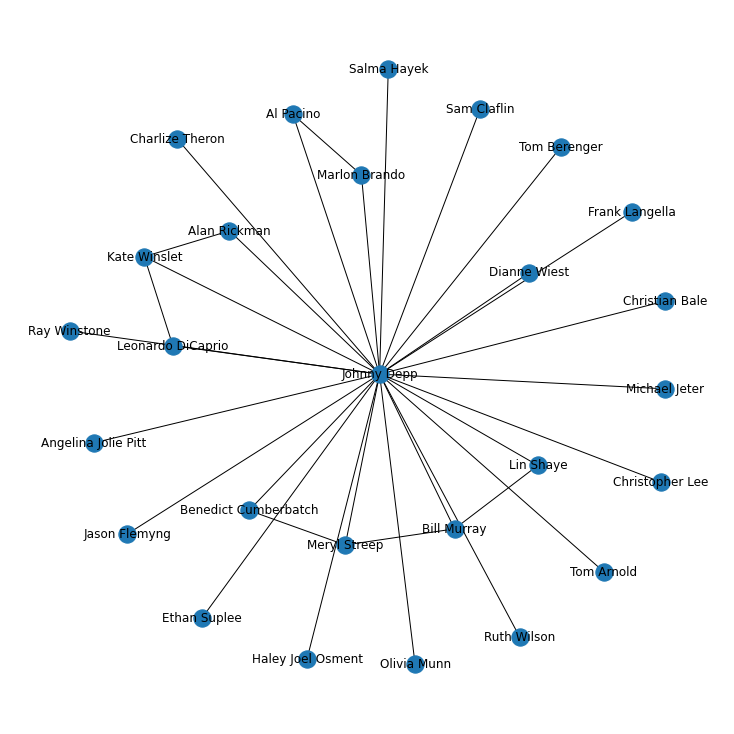

In [27]:
plt.figure(figsize=(10,10))
# First we need to get a list of the Degrees and filter by most popular
deg_list = list(nx.degree(G))
deg_list.sort(key=lambda no_edges:no_edges[1])

# Second we need to create a list of all of Actor 2s
max_deg_node = deg_list[len(G)-1][0]
list_deg_node = list(G[max_deg_node])
list_deg_node.append(max_deg_node)

# Third, we plot
G_Sub = G.subgraph(list_deg_node)
nx.draw(G_Sub, with_labels=True)

I won't plot the minimum becuase it is just several actors with 1, and almost axiomatically uninteresting ones.

In [29]:
closenessCentrality = nx.closeness_centrality(G)


['Rory Kinnear',
 'Tom Hardy',
 'Christian Bale',
 'Brad Garrett',
 'Donna Murphy',
 'Chris Hemsworth',
 'Robert Downey Jr.',
 'Alan Rickman',
 'Daniel Radcliffe']

### Compare

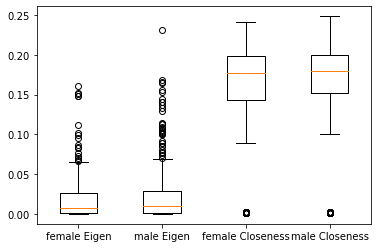

[Text(1, 0, 'female Degree'), Text(2, 0, 'male Degree')]

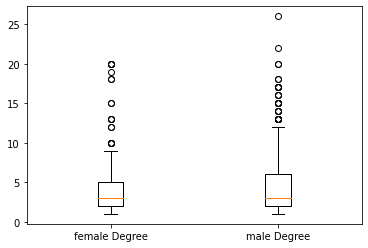

In [30]:
genderDict = nx.get_node_attributes(G,'gender')
centrality = {key: value for key, value in nx.eigenvector_centrality(G).items() if key in genderDict.keys()}
degreeDict = nx.degree(G)
comboDict =  {key:{"gender":genderDict[key], "eigen":value, "closeness":closenessCentrality[key], "degree":degreeDict[key]}  for (key,value) in  centrality.items()}
femaleEigen= [value["eigen"] for key, value in comboDict.items() if value["gender"]=="female"]
maleEigen = [value["eigen"] for key, value in comboDict.items() if value["gender"]=="male"]
femaleCloseness= [value["closeness"] for key, value in comboDict.items() if value["gender"]=="female"]
maleCloseness = [value["closeness"] for key, value in comboDict.items() if value["gender"]=="male"]
femaleDegree= [value["degree"] for key, value in comboDict.items() if value["gender"]=="female"]
maleDegree = [value["degree"] for key, value in comboDict.items() if value["gender"]=="male"]

fig, ax = plt.subplots()
ax.boxplot([femaleEigen,maleEigen,femaleCloseness,maleCloseness])
ax.set_xticklabels(["female Eigen","male Eigen", "female Closeness", "male Closeness"])
plt.show()
fig, ax = plt.subplots()
ax.boxplot([femaleDegree,maleDegree])
ax.set_xticklabels(["female Degree","male Degree"])


We drop the few data we don't have categorical labels for, and process out Closeness centrality, degree centrality, and eigenvector centrality. 

We see that the IQR for female and male eigenvector centrality is not so very different but that the outliers are more extreme and more plentiful. On closeness centrality, it is less clear because of stacking of outliers, but we can see that again the IQRs are similar.  

On degree centrality we see a modestly reduced IQR for female actors. 

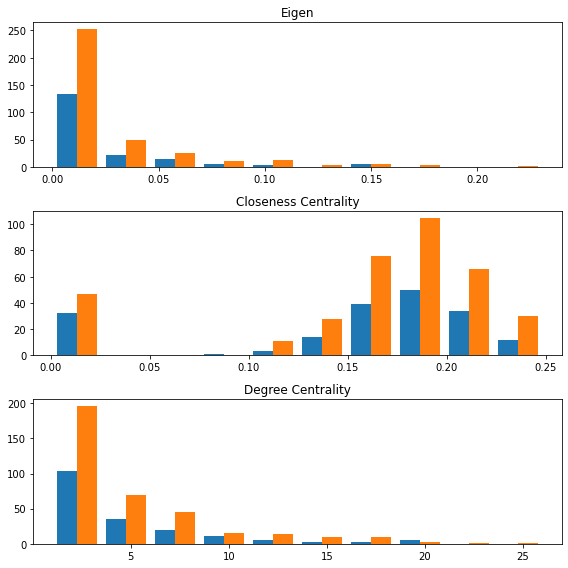

In [31]:
label=["female","male"]
fig, ((ax0, ax1,ax2)) = plt.subplots(nrows=3, ncols=1,figsize=(8,8))
ax0.hist([femaleEigen,maleEigen],label=label)
ax0.set_title("Eigen")
ax1.hist([femaleCloseness,maleCloseness],label=label)
ax1.set_title("Closeness Centrality")
ax2.hist([femaleDegree,maleDegree],label=label)
ax2.set_title("Degree Centrality")
fig.tight_layout()
plt.show()

Looking at histogram plots we see data on closeness we see a concetration of lowly connected nodes. We don't see in this uncaled shape a marked difference in shape.

In [33]:
genderDF = pd.DataFrame.from_dict(comboDict, orient="index")
eigenTtest = st.mannwhitneyu(genderDF.loc[genderDF["gender"]=="male",'eigen'], genderDF.loc[genderDF["gender"]=="female",'eigen']) 
degreeTtest = st.mannwhitneyu(genderDF.loc[genderDF["gender"]=="male",'degree'], genderDF.loc[genderDF["gender"]=="female",'degree']) 
closenessTtest = st.mannwhitneyu(genderDF.loc[genderDF["gender"]=="male",'closeness'], genderDF.loc[genderDF["gender"]=="female",'closeness']) 
pd.DataFrame([["eigen",eigenTtest.pvalue],["degree",degreeTtest.pvalue],["closeness",closenessTtest.pvalue]], columns=["type","p Value"])

,type,p Value
0,eigen,0.255093
1,degree,0.307774
2,closeness,0.238899


We are aware that the distributions are skewed. Runnning Mann-Whitney U test for independence we do not see a pvalue that would cause us to assume these have differing medians.

In [183]:
eigenTtest = st.ttest_ind(genderDF.loc[genderDF["gender"]=="male",'eigen'], genderDF.loc[genderDF["gender"]=="female",'eigen'] , equal_var=False) 
degreeTtest = st.ttest_ind(genderDF.loc[genderDF["gender"]=="male",'degree'], genderDF.loc[genderDF["gender"]=="female",'degree'],equal_var=False) 
closenessTtest = st.ttest_ind(genderDF.loc[genderDF["gender"]=="male",'closeness'], genderDF.loc[genderDF["gender"]=="female",'closeness'],equal_var=False) 
pd.DataFrame([["eigen",eigenTtest.pvalue],["degree",degreeTtest.pvalue],["closeness",closenessTtest.pvalue]], columns=["type","p Value"])

,type,p Value
0,eigen,0.373160
1,degree,0.499701
2,closeness,0.155293


Were we to try a blind uncorrected t_test (Welch's) we would find not much likelihood of means differing. 

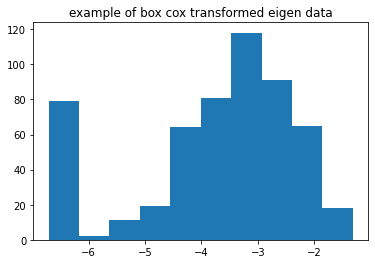

,gender,eigen,closeness,degree,eigenBoxCox,degreeBoxCox,closenessBoxCox
Christoph Waltz,female,5.039456e-02,0.204948,6,-2.414077,1.585643,-0.762571
Tom Hardy,male,6.848655e-02,0.211957,8,-2.212522,1.805346,-0.756305
Christian Bale,female,1.516433e-01,0.236406,19,-1.645529,2.415310,-0.734330
Brad Garrett,male,3.300430e-03,0.165274,3,-3.854272,1.018673,-0.797744
Donna Murphy,male,3.763300e-04,0.138469,2,-4.650390,0.660733,-0.821176
...,...,...,...,...,...,...,...
Caleb Landry Jones,male,1.955832e-03,0.149786,2,-4.070157,0.660733,-0.811320
Alex Kendrick,male,8.494887e-16,0.000950,1,-6.708241,0.000000,-0.932889
Steven Weber,female,1.357224e-04,0.126709,1,-4.944583,0.000000,-0.831357
Mircea Monroe,male,1.118642e-03,0.147211,1,-4.282922,0.000000,-0.813566


In [176]:
genderDF["eigenBoxCox"]= st.boxcox(genderDF['eigen'])[0]
genderDF["degreeBoxCox"]= st.boxcox(genderDF['degree'])[0]
genderDF["closenessBoxCox"]= st.boxcox(genderDF['closeness'])[0]
plt.hist([genderDF["eigenBoxCox"]])
plt.title("example of box cox transformed eigen data")
plt.show()


In [181]:

eigenTtest = st.ttest_ind(genderDF.loc[genderDF["gender"]=="male",'eigenBoxCox'], genderDF.loc[genderDF["gender"]=="female",'eigenBoxCox'] , equal_var=False) 
degreeTtest = st.ttest_ind(genderDF.loc[genderDF["gender"]=="male",'degreeBoxCox'], genderDF.loc[genderDF["gender"]=="female",'degreeBoxCox'],equal_var=False) 
closenessTtest = st.ttest_ind(genderDF.loc[genderDF["gender"]=="male",'closenessBoxCox'], genderDF.loc[genderDF["gender"]=="female",'closenessBoxCox'],equal_var=False) 
pd.DataFrame([["eigen",eigenTtest.pvalue],["degree",degreeTtest.pvalue],["closeness",closenessTtest.pvalue]], columns=["type","p Value"])

,type,p Value
0,eigen,0.172887
1,degree,0.319730
2,closeness,0.155315


While a Welch's t-test handles skew well, we can apply boxcox to try to compel a normal distribution. Unsurprisingly this doesn't do anything to allow us to say anything more.

This result means we can't say there is a categorical difference on our chosen measures of centrality. 